# Comprendre le chômage en France

Vous êtes vous déjà demandé d'où sortaient les chiffres qu'annoncent les politiques ou les media lorsqu'ils parlent de chômage. Etant un sujet d'intérêt dans les pays occidents, tentons de comprendre ce qu'ils se passent en termes de chômages en France. Pour cela, nous avons récupéré des données sur [data.gouv](https://www.insee.fr/fr/statistiques/3555153#consulter). Elles représentent les données du chômage en France en 2017



## Documentation du dataset

Regarder la documentation du dataset [ici](https://www.insee.fr/fr/statistiques/3555153#documentation)

* Allez sur le lien suivant : [Dataset](https://www.insee.fr/fr/statistiques/3555153#consulter) et téléchargez le petit dataset de 9Mo.

* En utilisant la commande `!unzip filename.zip` dézippez le fichier que vous avez téléchargé

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from zipfile import ZipFile
!unzip /content/drive/MyDrive/Colab_Notebooks/fd_eec17_dbase.zip

Archive:  /content/drive/MyDrive/Colab_Notebooks/fd_eec17_dbase.zip
replace fdeec17.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fdeec17.dbf             
replace varlist.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: varlist.dbf             
replace varmod.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: varmod.dbf              


* Importez les librairies
  * pandas
  * numpy

In [8]:
import pandas as pd
import numpy as np

* Nous allons avoir besoin d'installer une librairie sur notre notebook pour pouvoir lire les fichiers. Utilisez la commande suivante :

`!pip install simpledbf`

In [5]:
!pip install simpledbf

  Preparing metadata (setup.py) ... done
  Created wheel for simpledbf: filename=simpledbf-0.2.6-py3-none-any.whl size=13785 sha256=8dd29b7e642f991bddad6466a1f4bd870888d44774ae72bdc5cfd9adc866174f
  Stored in directory: /root/.cache/pip/wheels/e5/41/13/ebdef29165b9309ec4e235dbff19eca8b6759125b0924ad430
Successfully built simpledbf


* Appliquez ensuite le code suivant :

```
from simpledbf import Dbf5
dataset = Dbf5("fdeec17.dbf").to_dataframe()
dataset.head()
```

In [9]:
from simpledbf import Dbf5
dataset = Dbf5("fdeec17.dbf").to_dataframe()
dataset.head()

,ANNEE,TRIM,CATAU2010R,METRODOM,TYPMEN7,AGE3,AGE5,COURED,ENFRED,NFRRED,...,DIP11,CSTOTPRM,IDENTM,EXTRIAN,EMPNBH,HREC,HHCE,HPLUSA,JOURTR,NBTOTE
0,2017,1,1,1,2,50,50,2,1,1,...,30,52,1,263.388752,37.0,NaN,37.0,NaN,5.0,NaN
1,2017,1,1,1,2,15,15,2,2,1,...,42,52,1,263.388752,32.0,NaN,32.0,NaN,4.0,NaN
2,2017,1,1,1,2,15,15,2,2,1,...,31,52,1,263.388752,38.0,NaN,38.0,NaN,5.0,NaN
3,2017,3,1,1,2,50,50,2,1,1,...,30,52,2,176.893923,37.0,NaN,37.0,NaN,5.0,NaN
4,2017,3,1,1,2,15,15,2,2,1,...,42,52,2,176.893923,40.0,NaN,32.0,NaN,4.0,NaN


* Importez `matplotlib`

In [10]:
import matplotlib.pyplot as plt

* En faisant un [pie-chart](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html), montrez la part de chômeurs, d'inactifs et d'actifs occupés en France à partir de la variable ACTEU. Faites attention de faire apparaitre :

  * Le pourcentage de chaque partie
  * Une légende

Pour cela nous allons renommer les catégories numériques afin d'avoir une légende plus parlante. Analyser la ligne de commande suivante et comprenez comment elle fonctionne.

In [11]:
chomeurs = dataset.ACTEU.apply(lambda x:
                               "Actif Occupé" if x=="1"
                               else "Chômeur" if x == "2"
                               else "Inactif" if x=="3"
                               else "NAN")

In [12]:
nombre_personnes_par_categorie = chomeurs.value_counts()
print(nombre_personnes_par_categorie)

Inactif         207520
Actif Occupé    198054
Chômeur          21864
NAN               1204
Name: ACTEU, dtype: int64


In [13]:
explode = (0.2,0.2,0.5,0.1)

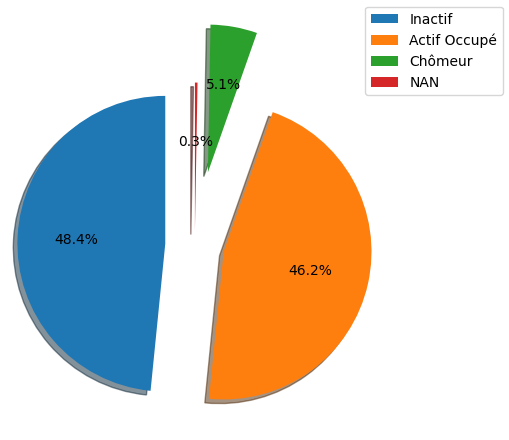

In [14]:
fig1, ax1 = plt.subplots()
ax1.pie(nombre_personnes_par_categorie, autopct='%1.1f%%',
        shadow=True, startangle=90, explode = explode)
fig1.legend(nombre_personnes_par_categorie.index)

---> Le chiffre du chômage semble bas et, si on regarde l'explication des *inactifs*, celle-ci semble inclure beaucoup de monde (étudiants, personne ne cherchant pas d'emploi etc.)

* Faites le même graphique sur la variable ACTEU6 qui est plus précise sur le type d'actifs   
Renommer les valeurs numériques :   
    1 : Actif Occupé  
    3 : Chômeur PSERE  
    4 : Autre Chômeur BIT  
    5 : Etudiant, élève, stagiaire en formation  
    6 : Autres inactifs (dont retraité)  
    

In [15]:
chomeurs2 = dataset.ACTEU6.apply(lambda x:
                               "Actif Occupé" if x=="1"
                               else "Chômeur PSERE" if x=="3"
                               else "Autre Chômeur BIT" if x=="4"
                               else "Etudiant, élève, stagiaire en formation" if x=="5"
                               else "Autres inactifs (dont retraité)" if x=="6"
                               else "NAN")

In [16]:
nombre_personnes_par_categorie2 = chomeurs2.value_counts()
print(nombre_personnes_par_categorie2)

Actif Occupé                               198054
Autres inactifs (dont retraité)            172921
Etudiant, élève, stagiaire en formation     34599
Chômeur PSERE                               20854
NAN                                          1204
Autre Chômeur BIT                            1010
Name: ACTEU6, dtype: int64


In [17]:
explode2 = (0.1,0.1,0.3,0.2,0.5,0.1)

([<matplotlib.patches.Wedge at 0x7b15f231d3c0>,
 [Text(-1.1914815158966767, 0.142729805144396, ''),
  Text(1.028091590974642, -0.6188923012667304, ''),
  Text(0.7809063861321943, 1.161974705446705, ''),
  Text(0.23950903230881151, 1.2777462281073253, ''),
  Text(0.03780333155086882, 1.5995533464450804, ''),
  Text(0.008882901402182416, 1.1999671220757173, '')],
 [Text(-0.6950308842730615, 0.08325905300089766, '46.2%'),
  Text(0.5997200947352078, -0.36102050907225935, '40.3%'),
  Text(0.5020112482278392, 0.7469837392157388, '8.1%'),
  Text(0.14739017372849939, 0.7863053711429693, '4.9%'),
  Text(0.025989790441222307, 1.0996929256809926, '0.3%'),
  Text(0.00518169248460641, 0.6999808212108349, '0.2%')])

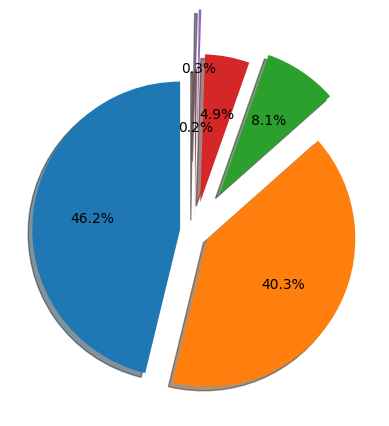

In [18]:
fig1, ax1 = plt.subplots()
ax1.pie(nombre_personnes_par_categorie2, autopct='%1.1f%%',
        shadow=True, startangle=90, explode = explode2)

Regardez la documentation pour renommer les valeurs de la colonne ACTEU.

In [19]:
nombre_personnes_par_categorie = chomeurs.value_counts()
print(nombre_personnes_par_categorie)

Inactif         207520
Actif Occupé    198054
Chômeur          21864
NAN               1204
Name: ACTEU, dtype: int64


* En créant un [stacked bar chart](https://pythonmatplotlibtips.blogspot.com/2018/11/normalized-stacked-barplot-number-percentage-python-matplotlib.html), comparez :

  * le rapport *chômeurs* / *Actifs occupés*
  * Le rapport *chômeurs* / *Actifs occupés + Inactifs*

In [20]:
chomeurs = dataset.ACTEU.apply(lambda x:
                               "Actif Occupé" if x=="1"
                               else "Chômeur" if x == "2"
                               else "Inactif" if x=="3"
                               else "NAN")

chart_data = chomeurs.value_counts()
chart_data

Inactif         207520
Actif Occupé    198054
Chômeur          21864
NAN               1204
Name: ACTEU, dtype: int64

In [21]:
chom_actif = chart_data[2] / chart_data[1]
chom_actif_inactif = chart_data[2] / (chart_data[1] + chart_data[0])

data = [chom_actif, chom_actif_inactif]
print("Rapports de chômeurs\n {}".format(data))

Rapports de chômeurs
 [0.11039413493289708, 0.05390878113488537]


In [22]:
data_actifs = np.array([1,1]) - data
print("Rapports d'actifs\n {}".format(data_actifs))

Rapports d'actifs
 [0.88960587 0.94609122]


In [23]:
legend = ["Chômeurs / Actifs Occupés", "Chômeurs / Actifs + Inactifs"]
legend

['Chômeurs / Actifs Occupés', 'Chômeurs / Actifs + Inactifs']

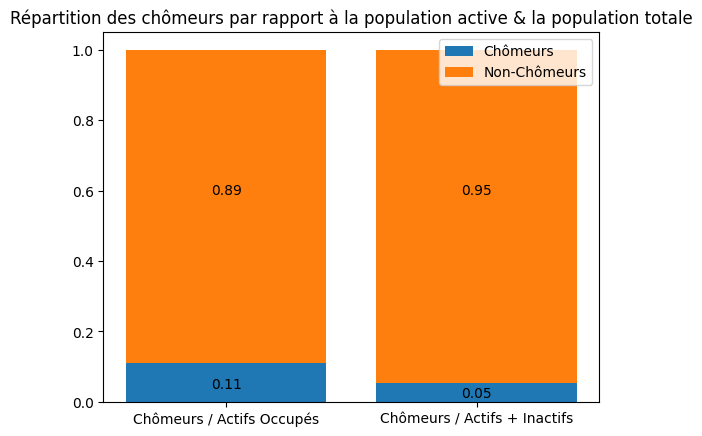

In [24]:
fig, ax1 = plt.subplots(1, 1)

ax1.bar(legend,
         data,
        label="Chômeurs")

ax1.bar(legend,
        data_actifs,
        bottom=data,
        label="Non-Chômeurs")

ax1.text(legend[0], 0.6, np.round(data_actifs[0],2), ha="center", va="center")
ax1.text(legend[0], 0.05, np.round(data[0],2), ha="center", va="center")

ax1.text(legend[1], 0.6, np.round(data_actifs[1],2), ha="center", va="center")
ax1.text(legend[1], 0.025, np.round(data[1],2),ha="center", va="center")

ax1.legend()
ax1.set_title("Répartition des chômeurs par rapport à la population active & la population totale")

plt.show()

<BarContainer object of 2 artists>

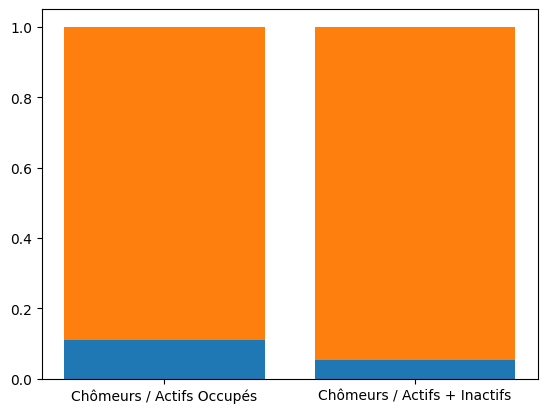

In [25]:
rapport1=[0.11039413493289708, 0.05390878113488537]
rapport2=[0.88960587, 0.94609122]
axex = ["Chômeurs / Actifs Occupés", "Chômeurs / Actifs + Inactifs"]

plt.bar(axex,rapport1)
plt.bar(axex,rapport2,bottom=data,)

Il semblerait que nous étions 11% de chômeurs parmi la population active (travailleuse) en France en 2017 selon le BIT

* En créant à nouveau un [*bar chart*](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) , regardez cette fois la répartition de l'ancienneté du chômage. Le nom de la variable est ANCCHOM, regardez la documentation pour recoder la valeur de cette colonne.

In [26]:
duree_chomage = dataset.ANCCHOM.apply(lambda x:
                                       "Moins d'un mois" if x=="1"
                                       else "De 1 mois à moins de 3 mois" if x == "2"
                                       else "De 3 mois à moins de 6 mois" if x=="3"
                                       else "De 3 mois à moins de 6 mois" if x=="3"
                                       else "De 6 mois à moins d'un an" if x=="4"
                                       else "De 1 an à moins d'un an et demi" if x=="5"
                                       else "De 1 an et demi à moins de 2 ans" if x=="6"
                                       else "De 2 ans à moins de 3 ans" if x=="7"
                                       else "3 ans ou plus" if x=="8"
                                       else "NAN")

chart_data = duree_chomage.value_counts()
chart_data


NAN                                 406904
3 ans ou plus                         3906
De 6 mois à moins d'un an             3648
De 1 an à moins d'un an et demi       3398
De 1 mois à moins de 3 mois           3270
De 3 mois à moins de 6 mois           3193
De 2 ans à moins de 3 ans             2289
De 1 an et demi à moins de 2 ans      1132
Moins d'un mois                        902
Name: ANCCHOM, dtype: int64

<BarContainer object of 8 artists>

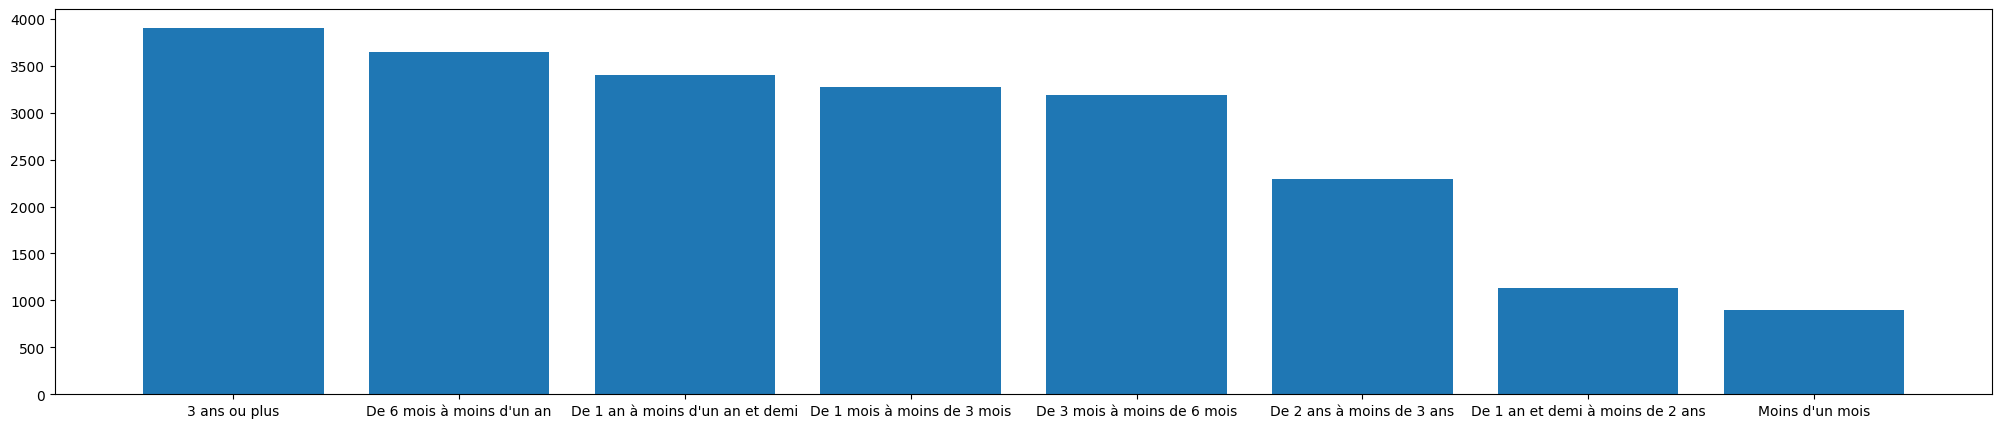

In [27]:
plt.figure(figsize=(25,5))
plt.bar(chart_data.index[1:], chart_data.values[1:])

* La répartition se voit assez mal sur le *bar chart*, tentez de le refaire sur un *pie chart*

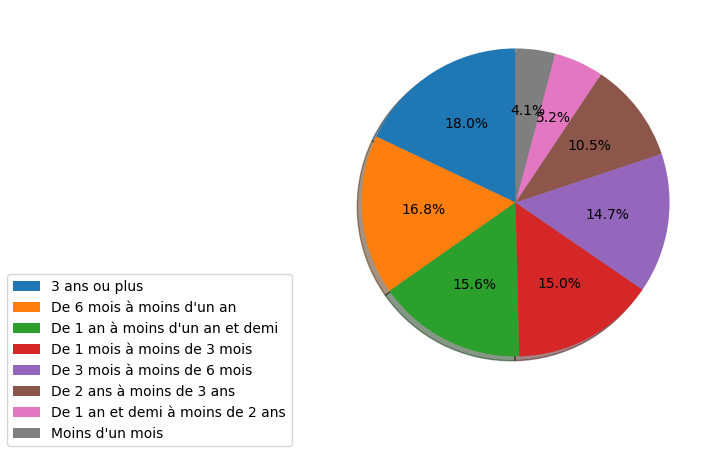

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(chart_data[1:],
       autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       radius=1
       )
fig.legend(chart_data.index[1:], loc="lower left")

* Il serait intéressant de voir la répartition des personnes inscrites à Pôle Emploi ou dans un organisme de placement parmi ces personnes au chômage. Regardez cette répartition grâce à la colonne CONTACT
  * Enlevez directement les NaN de votre graphique

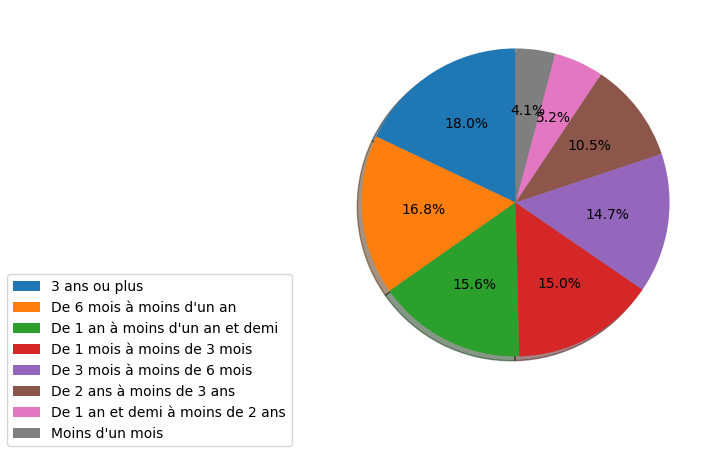

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(chart_data[1:],
       autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       radius=1
       )
fig.legend(chart_data.index[1:], loc="lower left")

Text(0.5, 1.0, 'Inscription dans un organisme de placement')

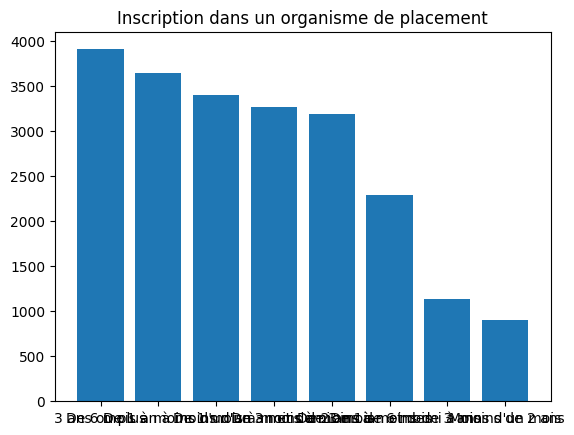

In [30]:
plt.bar(chart_data[1:].index, chart_data[1:].values)
plt.title("Inscription dans un organisme de placement")

* Regardons ce qui pousse les français à changer d'emploi, grâce à la colonne CREACCP, crééz un bar chart horizontale qui va permettre de connaitre les principales raisons de changement d'emploi des français.

In [31]:
creaccp = dataset.CREACCP.apply(lambda x:

                                "Risque de perdre ou va perdre son emploi actuel (y compris fin de contrats courts)" if x=="1"
                                else "Désire un emploi plus intéressant" if x == "2"
                                else "Veut un emploi plus stable (CDI)" if x == "3"
                                else "Veut travailler plus d'heures" if x == "4"
                                else "Désire un travail avec un rythme horaire plus adapté ou plus modulable" if x == "5"
                                else "Désire des conditions de travail moins pénibles ou plus adaptées à sa santé" if x == "6"
                                else "Désire augmenter ses revenus" if x == "7"
                                else "Désire diminuer son temps de transport" if x == "8"
                                else "Doit ou veut déménager" if x == "9"
                                else "Veut s'installer à son compte" if x == "10"
                                else "Veut changer de métier ou de secteur" if x == "11"
                                else "Trouve l'ambiance de travail mauvaise, les relations de travail conflictuelles" if x == "12"
                                else "NAN")

chart_data = creaccp.value_counts(ascending=True)
chart_data

Doit ou veut déménager                                                                   216
Veut s'installer à son compte                                                            354
Désire diminuer son temps de transport                                                   598
Désire un travail avec un rythme horaire plus adapté ou plus modulable                  1102
Trouve l'ambiance de travail mauvaise, les relations de travail conflictuelles          1223
Veut changer de métier ou de secteur                                                    1392
Veut travailler plus d'heures                                                           1404
Risque de perdre ou va perdre son emploi actuel (y compris fin de contrats courts)      1582
Désire des conditions de travail moins pénibles ou plus adaptées à sa santé             1820
Veut un emploi plus stable (CDI)                                                        2462
Désire un emploi plus intéressant                                     

In [32]:
s = np.sum(chart_data.values[:-1])
s

21707

In [33]:
s = np.sum(chart_data.values[:-1])
s

21707

NameError: name 'repartition' is not defined

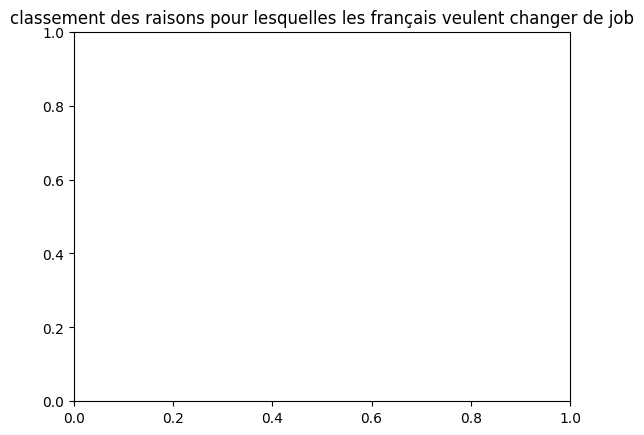

In [35]:
plt.title("classement des raisons pour lesquelles les français veulent changer de job")
plt.barh(chart_data.index[:-1], repartition)
plt.xlabel("Répartition en Pourcentage")

for i in range(len(repartition)):
  plt.text(repartition[i], chart_data.index[:-1][i],'{}%'.format(repartition[i]))

plt.show()